In [1]:
import pandas as pd
import re
import nltk
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

# Ensure the required NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize necessary objects
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df=pd.read_csv('swiggyinstamart_tweets.csv')

In [3]:
df.head()


,id,createdAt,twitterUrl,likeCount,retweetCount,viewCount,text
0,1.609812e+18,2023-01-02 07:20:26+00:00,https://twitter.com/Chak_Ankhi/status/16098118...,0,0,162.0,Is this funny @Swiggy @SwiggyInstamart \n\nThe...
1,1.609861e+18,2023-01-02 10:35:00+00:00,https://twitter.com/themukulagrawal/status/160...,50,5,5603.0,"Swiggy's losses jump 2X to Rs 3,629 crore in F..."
2,1.609892e+18,2023-01-02 12:37:28+00:00,https://twitter.com/co_goyal/status/1609891626...,0,4,472.0,I want to lodge complaint against the delivery...
3,1.609935e+18,2023-01-02 15:29:14+00:00,https://twitter.com/RoyalmanR/status/160993485...,0,0,317.0,Hi @SwiggyCares \nDo your support team really ...
4,1.609948e+18,2023-01-02 16:22:14+00:00,https://twitter.com/Ashmeet18/status/160994819...,0,0,97.0,Another day and another highly pathetic servic...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2325 non-null   float64
 1   createdAt     2325 non-null   object 
 2   twitterUrl    2325 non-null   object 
 3   likeCount     2325 non-null   int64  
 4   retweetCount  2325 non-null   int64  
 5   viewCount     2325 non-null   float64
 6   text          2325 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 127.3+ KB


In [5]:
df.isnull().sum()

id              0
createdAt       0
twitterUrl      0
likeCount       0
retweetCount    0
viewCount       0
text            0
dtype: int64

In [6]:
df.columns

Index(['id', 'createdAt', 'twitterUrl', 'likeCount', 'retweetCount',
       'viewCount', 'text'],
      dtype='object')

In [7]:
def remove_emojis(text):
    # This function removes emojis from the text
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [8]:
additional_words_to_remove = {"blinkit", "zepto", "bigbasket", "swiggy instamart", "zomato", "swiggy","swiggycares","bigbasketcom","dunzo","jiomart",
                             "isntamart" ,"dmart"}

In [9]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', ' ', text)  # Replace mentions with whitespace
    text = re.sub(r'[^\w\s#]', '', text)  # Remove punctuation, including apostrophes 
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = remove_emojis(text)  # Remove emojis
    text_tokens = word_tokenize(text)

    # Filter out tokens containing any of the additional words to remove
    filtered_text = [w for w in text_tokens if w not in stop_words and not any(word in w for word in additional_words_to_remove)]
    
    return " ".join(filtered_text)

In [10]:
df['processed_text']=df['text'].apply(data_processing)

In [11]:
print(df)

                id                  createdAt  \
0     1.609812e+18  2023-01-02 07:20:26+00:00   
1     1.609861e+18  2023-01-02 10:35:00+00:00   
2     1.609892e+18  2023-01-02 12:37:28+00:00   
3     1.609935e+18  2023-01-02 15:29:14+00:00   
4     1.609948e+18  2023-01-02 16:22:14+00:00   
...            ...                        ...   
2320  1.791566e+18  2024-05-17 20:26:15+00:00   
2321  1.791567e+18  2024-05-17 20:28:59+00:00   
2322  1.791568e+18  2024-05-17 20:34:01+00:00   
2323  1.791578e+18  2024-05-17 21:15:44+00:00   
2324  1.791582e+18  2024-05-17 21:31:28+00:00   

                                             twitterUrl  likeCount  \
0     https://twitter.com/Chak_Ankhi/status/16098118...          0   
1     https://twitter.com/themukulagrawal/status/160...         50   
2     https://twitter.com/co_goyal/status/1609891626...          0   
3     https://twitter.com/RoyalmanR/status/160993485...          0   
4     https://twitter.com/Ashmeet18/status/160994819...      

In [12]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [13]:
def lemmatization(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    return ' '.join(lemmatized_words)

In [14]:
df['processed_text'] = df['processed_text'].apply(lemmatization)

In [15]:
f = df.dropna(subset=['processed_text'])
df = df[df['processed_text'].str.strip().astype(bool)]

In [16]:
df.head()

,id,createdAt,twitterUrl,likeCount,retweetCount,viewCount,text,processed_text
0,1.609812e+18,2023-01-02 07:20:26+00:00,https://twitter.com/Chak_Ankhi/status/16098118...,0,0,162.0,Is this funny @Swiggy @SwiggyInstamart \n\nThe...,funny delivery address bike position show dest...
1,1.609861e+18,2023-01-02 10:35:00+00:00,https://twitter.com/themukulagrawal/status/160...,50,5,5603.0,"Swiggy's losses jump 2X to Rs 3,629 crore in F...",loss jump 2x r 3629 crore fy22 layoff come
2,1.609892e+18,2023-01-02 12:37:28+00:00,https://twitter.com/co_goyal/status/1609891626...,0,4,472.0,I want to lodge complaint against the delivery...,want lodge complaint delivery boy name sachin ...
3,1.609935e+18,2023-01-02 15:29:14+00:00,https://twitter.com/RoyalmanR/status/160993485...,0,0,317.0,Hi @SwiggyCares \nDo your support team really ...,hi support team really understand english anno...
4,1.609948e+18,2023-01-02 16:22:14+00:00,https://twitter.com/Ashmeet18/status/160994819...,0,0,97.0,Another day and another highly pathetic servic...,another day another highly pathetic service pl...


In [17]:
def polarity(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

In [18]:
df['polarity'] = df['processed_text'].apply(polarity)

In [19]:
df.head(10)

,id,createdAt,twitterUrl,likeCount,retweetCount,viewCount,text,processed_text,polarity
0,1.609812e+18,2023-01-02 07:20:26+00:00,https://twitter.com/Chak_Ankhi/status/16098118...,0,0,162.0,Is this funny @Swiggy @SwiggyInstamart \n\nThe...,funny delivery address bike position show dest...,0.2263
1,1.609861e+18,2023-01-02 10:35:00+00:00,https://twitter.com/themukulagrawal/status/160...,50,5,5603.0,"Swiggy's losses jump 2X to Rs 3,629 crore in F...",loss jump 2x r 3629 crore fy22 layoff come,-0.3182
2,1.609892e+18,2023-01-02 12:37:28+00:00,https://twitter.com/co_goyal/status/1609891626...,0,4,472.0,I want to lodge complaint against the delivery...,want lodge complaint delivery boy name sachin ...,0.0000
3,1.609935e+18,2023-01-02 15:29:14+00:00,https://twitter.com/RoyalmanR/status/160993485...,0,0,317.0,Hi @SwiggyCares \nDo your support team really ...,hi support team really understand english anno...,-0.1189
4,1.609948e+18,2023-01-02 16:22:14+00:00,https://twitter.com/Ashmeet18/status/160994819...,0,0,97.0,Another day and another highly pathetic servic...,another day another highly pathetic service pl...,-0.7346
5,1.610101e+18,2023-01-03 02:28:35+00:00,https://twitter.com/nishani29465765/status/161...,0,0,541.0,When #SwiggyInstamart plays with people's mon...,play people money receive completely different...,-0.0954
6,1.610139e+18,2023-01-03 05:01:32+00:00,https://twitter.com/saharshg10/status/16101392...,1,0,20.0,Is it just with the help of Instamart?\n\n#Sup...,help instamart,0.4019
7,1.610155e+18,2023-01-03 06:04:47+00:00,https://twitter.com/GoodReturnsIN/status/16101...,0,0,77.0,Instamart now accounts for about 35% of Swiggy...,instamart account 35 revenue quickcommerce arm,0.0000
8,1.610198e+18,2023-01-03 08:55:44+00:00,https://twitter.com/FortuneIndia/status/161019...,2,2,464.0,The net loss of the food and grocery delivery ...,net loss food grocery delivery platform widen ...,-0.3182
9,1.610215e+18,2023-01-03 10:00:43+00:00,https://twitter.com/shalaa_finance/status/1610...,2,0,28.0,🚨SWIGGY'S REVENUE FROM OPERATIONS JUMPED 124% ...,revenue operation jumped 124 570490 cr fy22 lo...,-0.3182


In [20]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [21]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [22]:
print(df)

                id                  createdAt  \
0     1.609812e+18  2023-01-02 07:20:26+00:00   
1     1.609861e+18  2023-01-02 10:35:00+00:00   
2     1.609892e+18  2023-01-02 12:37:28+00:00   
3     1.609935e+18  2023-01-02 15:29:14+00:00   
4     1.609948e+18  2023-01-02 16:22:14+00:00   
...            ...                        ...   
2320  1.791566e+18  2024-05-17 20:26:15+00:00   
2321  1.791567e+18  2024-05-17 20:28:59+00:00   
2322  1.791568e+18  2024-05-17 20:34:01+00:00   
2323  1.791578e+18  2024-05-17 21:15:44+00:00   
2324  1.791582e+18  2024-05-17 21:31:28+00:00   

                                             twitterUrl  likeCount  \
0     https://twitter.com/Chak_Ankhi/status/16098118...          0   
1     https://twitter.com/themukulagrawal/status/160...         50   
2     https://twitter.com/co_goyal/status/1609891626...          0   
3     https://twitter.com/RoyalmanR/status/160993485...          0   
4     https://twitter.com/Ashmeet18/status/160994819...      

<Axes: xlabel='sentiment', ylabel='count'>

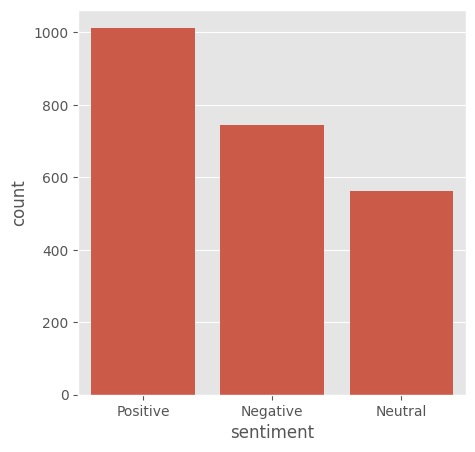

In [23]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data =df)

Text(0.5, 1.0, 'Distribution of sentiments')

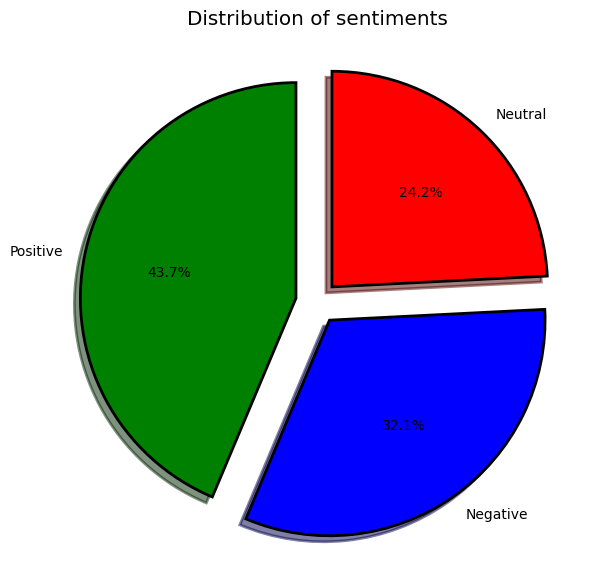

In [24]:
fig = plt.figure(figsize=(7,7))
colors = ("green", "blue", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [25]:
df.to_csv("swiggyinstamart_processed_tweets.csv",index=False)